In [ ]:
import numpy as np  
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow 

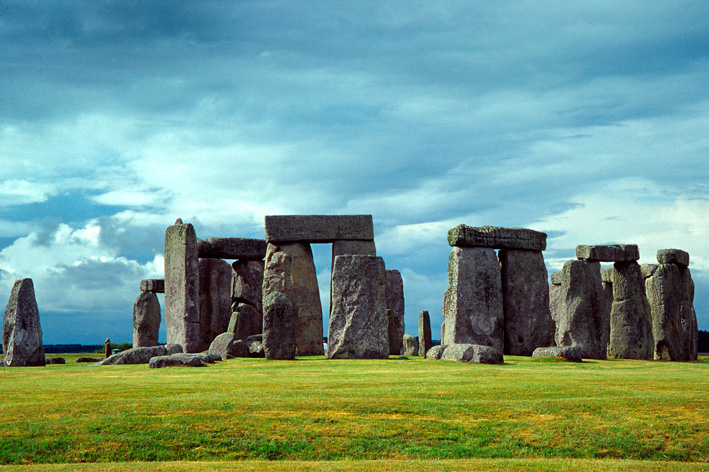

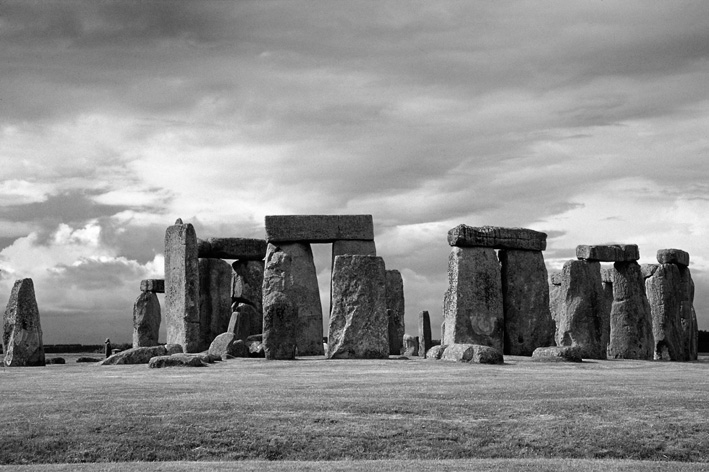

True

In [ ]:
 img_bgr=cv2.imread('sample_imgs/sample.jpg',1)
img_bw=cv2.imread('sample_imgs/sample.jpg',0)
cv2_imshow(img_bgr)
cv2_imshow(img_bw)
cv2.imwrite('sample_imgs/blacknwhite.jpg',img_bw)

Grayscale Image:


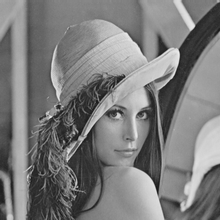

HSV image:


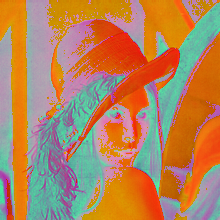

Hue :


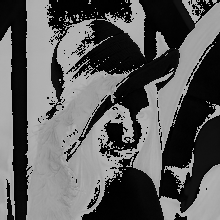

Saturation :


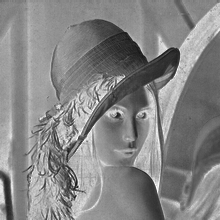

Value :


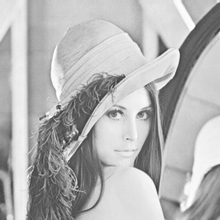

In [ ]:
img=cv2.imread("sample_imgs/hat_lady.png",1)
img_bw=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print("Grayscale Image:")
cv2_imshow(img_bw)
img_hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
print("HSV image:")
cv2_imshow(img_hsv)
print("Hue :")
cv2_imshow(img_hsv[:,:,0])
print("Saturation :")
cv2_imshow(img_hsv[:,:,1])
print("Value :")
cv2_imshow(img_hsv[:,:,2])

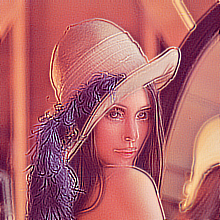

In [ ]:
kernel=np.array([[1,0,1],
                 [0,-3,0],
                 [1,0,1]])
img=img=cv2.imread("sample_imgs/hat_lady.png",1)
filter=cv2.filter2D(img,-1,kernel)
cv2_imshow(filter)

Blur image :


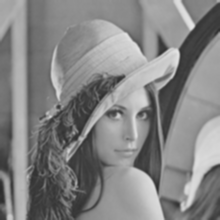

Edges of image :


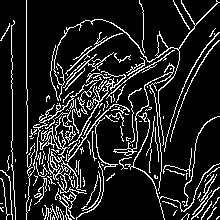

In [ ]:
img=cv2.imread("sample_imgs/hat_lady.png",0)
blur_img=cv2.GaussianBlur(img,(3,3),0)
print("Blur image :")
cv2_imshow(blur_img)
edge=cv2.Canny(blur_img,30,75)
print("Edges of image :")
cv2_imshow(edge)

#Lane Detection

In [ ]:
import os

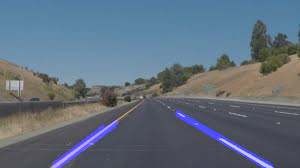

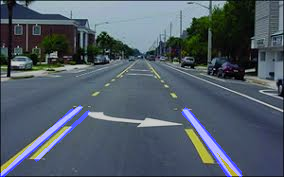

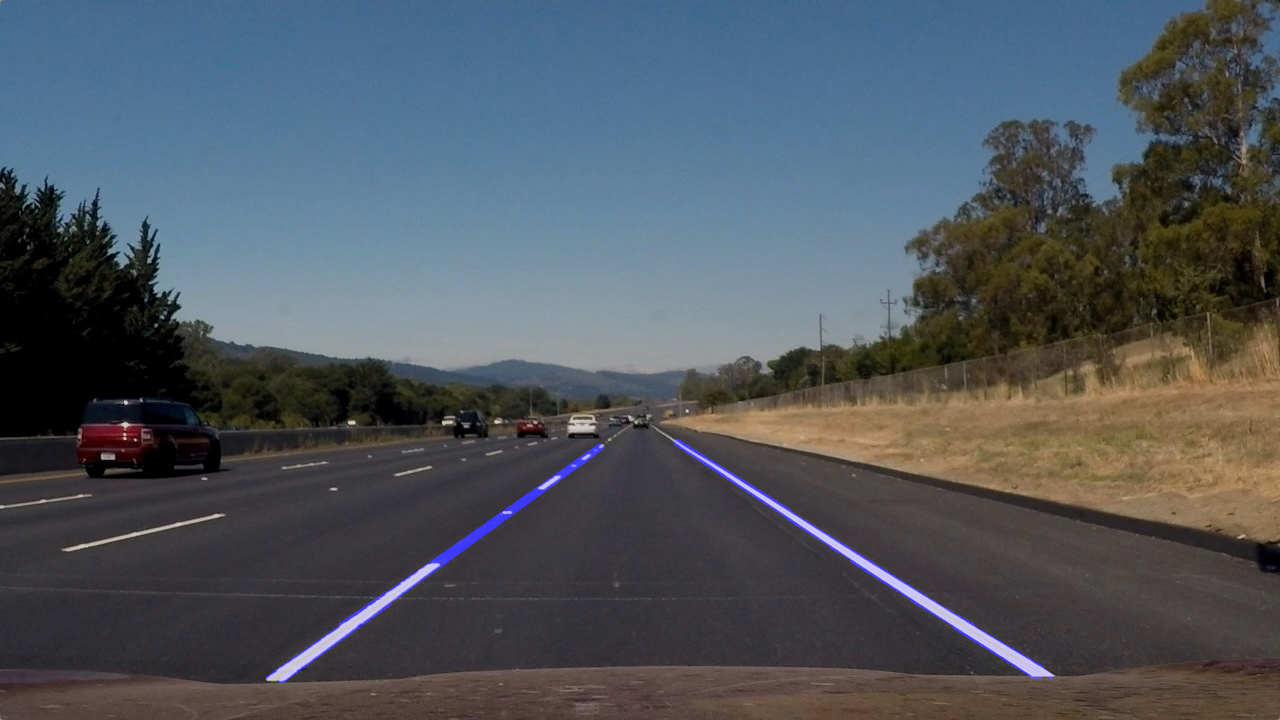

In [ ]:

def img2edge(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hsv_image  = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_yellow = np.array([20,100,100])
    upper_yellow = np.array([30,255,255])
    mask_y = cv2.inRange(hsv_image, lower_yellow, upper_yellow)     
    mask_w = cv2.inRange(gray_image, 216, 255)
    mask_yw = np.bitwise_or(mask_w,mask_y)
    mask_yw_image = np.bitwise_and(mask_yw,gray_image)

    img_blur = cv2.GaussianBlur(mask_yw_image, (3, 3), 0)
    img_canny = cv2.Canny(img_blur , 50 , 200)                                
    return img_canny
    
def roi_select(img, canny):
    lower_left = [0,img.shape[0]-1]
    lower_right = [img.shape[1]-1,img.shape[0]-1]
    top_left = [img.shape[1]/4,3*img.shape[0]/5]
    top_right = [3*img.shape[1]/4,3*img.shape[0]/5]
    vertices = [np.array([lower_left,top_left,top_right,lower_right],dtype=np.int32)]
    mask = np.zeros_like(canny)                     
    fill_color = 255                                
    cv2.fillPoly(mask, vertices, fill_color)     
    return  cv2.bitwise_and(canny, mask)

def draw_lines(img,canny_roi, rho_acc, theta_acc, thresh, minLL, maxLG):
    values=cv2.HoughLinesP(image=canny_roi, rho=rho_acc, theta=theta_acc, threshold=thresh, minLineLength = minLL, maxLineGap=maxLG)
    line_img=np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)
    for line in values :
        for x1,y1,x2,y2 in line :
          if (y1-y2)/(x1-x2)>0.5 or (y1-y2)/(x1-x2)<-0.5 : 
            cv2.line(line_img, (x1, y1), (x2, y2), [255,0,0], 3)
    return line_img  

def add_weighted(img, line_img):
  return cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)

for i in os.listdir('LD_test_imgs') : 
  img = cv2.imread('LD_test_imgs/'+i,1)                                 
  edge_img = img2edge(img)
  roi_img = roi_select(img, edge_img)
  hough_img = draw_lines(img,roi_img, 2, np.pi/180, 50, 50, 100)    
  lane_img = add_weighted(img, hough_img)
  cv2_imshow(lane_img)